## **Proyek Analisis Data: Bike Sharing Dataset**


- Nama: Zahra Maharani Putri

- Email: zhrmhrnputri2001@gmail.com

- ID Dicoding: zahra_maharani_putri_T8FO

## **Pertanyaan Bisnis**

1. What is the average bike sharing data when considering the influence of weather and season?

2.  What is the pattern of bike sharing data based on weekdays and holidays?

3.  Which date shows the most bike sharing data?

## **Packages / Library Used**

In [5]:
# Mengimpor packages / library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

First, we need to import all the packages or libraries that we will use in this data analysis.

## **Data Wrangling**

### Gathering Data

In [9]:
#memuat tabel untuk file csv day
day_df = pd.read_csv("data/day.csv")
day_df.head()

#memuat tabel untuk file csv hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The next thing after importing the library for data analysis is gathering data. Gathering data is collecting relevant and accurate information that can be used for analysis, decision making, and problem solving. So we load the csv data and insert it into the pandas DataFrame.

### Assessing Data

In [12]:
##MENILAI DATA day_df
day_df.info() #memeriksa tipe data tiap kolom
day_df.isna().sum() #menampilkan informasi terkait jumlah missing values, jika ada
print("Jumlah duplikasi: ", day_df.duplicated().sum()) #memeriksa duplikasi
day_df.describe() #memeriksa parameter statistik dari kolom numerik dalam file


##MENILAI DATA hour_df
hour_df.info() #memeriksa tipe data tiap kolom
hour_df.isna().sum() #menampilkan informasi terkait jumlah missing values, jika ada
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) #memeriksa duplikasi
hour_df.describe() #memeriksa parameter statistik dari kolom numerik dalam file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The above is used to assess the quality and characteristics of the data in DataFrame day_df and hour_df. As shown in the code, we can check the data type, display information about missing values, duplicate value information, etc.

### Cleaning Data

In [15]:
# Mengubah tipe data kolom 'dteday' menjadi kategori dengan label yang sesuai
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='mixed')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='mixed')

# Mengubah tipe data kolom 'season' dan 'weathersit' menjadi kategorikal dengan label yang sesuai
season_labels = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
weather_labels = ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat']

day_df['season'] = pd.Categorical(day_df['season'], categories=[1, 2, 3, 4], ordered=True)
day_df['season'] = day_df['season'].cat.rename_categories(season_labels)

day_df['weathersit'] = pd.Categorical(day_df['weathersit'], categories=[1, 2, 3, 4], ordered=True)
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories(weather_labels)

hour_df['season'] = pd.Categorical(hour_df['season'], categories=[1, 2, 3, 4], ordered=True)
hour_df['season'] = hour_df['season'].cat.rename_categories(season_labels)

hour_df['weathersit'] = pd.Categorical(hour_df['weathersit'], categories=[1, 2, 3, 4], ordered=True)
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories(weather_labels)

# Memeriksa perubahan
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(2), datetime64

The code above changes the data type that we think is wrong, such as for the dteday data type it is a date, so we change it to datetime. After making this change, the code checks the data structure with info() to ensure that the data type change has been applied correctly. In addition to the data type, we can also see from the previous step, which is assessing the data, but for this time, only the data type is wrong.

## **Exploratory Data Analysis (EDA)**

In [18]:
###Lakukan ekplorasi data
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


This code is used to perform data exploration by generating descriptive statistics for all columns in the day_df and hour_df DataFrames. By using describe(include=“all”), we get summary statistics that include information such as the number of values, unique values, most frequent values, frequency, as well as numerical statistics such as mean, standard deviation, minimum, maximum, and percentile. This helps us understand the distribution and basic characteristics of each column, both numeric and categorical, in the dataset.

#### View the demographics of the average bike borrower by season and weather

In [21]:
###Melihat demografi rata - rata peminjam sepeda berdasarkan musim dan cuaca
# Kelompokkan data berdasarkan musim dan hitung rata-rata jumlah peminjaman
season_avg_day = day_df.groupby('season')['cnt'].mean()
season_avg_hour = hour_df.groupby('season')['cnt'].mean()
print("Rata-rata peminjaman sepeda per musim:\n", season_avg_day)
print("Rata-rata peminjaman sepeda per musim:\n", season_avg_hour)

# Kelompokkan data berdasarkan kondisi cuaca dan hitung rata-rata jumlah peminjaman
weather_avg_day = day_df.groupby('weathersit')['cnt'].mean()
weather_avg_hour = hour_df.groupby('weathersit')['cnt'].mean()
print("\nRata-rata peminjaman sepeda per kondisi cuaca:\n", weather_avg_day)
print("\nRata-rata peminjaman sepeda per kondisi cuaca:\n", weather_avg_hour)

Rata-rata peminjaman sepeda per musim:
 season
Musim Semi      2604.132597
Musim Panas     4992.331522
Musim Gugur     5644.303191
Musim Dingin    4728.162921
Name: cnt, dtype: float64
Rata-rata peminjaman sepeda per musim:
 season
Musim Semi      111.114569
Musim Panas     208.344069
Musim Gugur     236.016237
Musim Dingin    198.868856
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda per kondisi cuaca:
 weathersit
Cerah           4876.786177
Mendung         4035.862348
Hujan Ringan    1803.285714
Hujan Lebat             NaN
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda per kondisi cuaca:
 weathersit
Cerah           204.869272
Mendung         175.165493
Hujan Ringan    111.579281
Hujan Lebat      74.333333
Name: cnt, dtype: float64


#### See the demographics of the average bike borrower by holiday and weekday

In [23]:
#Hitung jumlah peminjaman rata-rata pada hari kerja dan hari libur pada file DAY
weekday_avg_day = day_df[day_df['workingday'] == 1]['cnt'].mean()
holiday_avg_day = day_df[day_df['holiday'] == 1]['cnt'].mean()
print(f"Rata-rata peminjaman pada hari kerja (day.csv): {weekday_avg_day}")
print(f"Rata-rata peminjaman pada hari libur (day.csv) : {holiday_avg_day}")

#Hitung jumlah peminjaman rata-rata pada hari kerja dan hari libur pada file HOUR
weekday_avg_hour = hour_df[hour_df['workingday'] == 1]['cnt'].mean()
holiday_avg_hour = hour_df[hour_df['holiday'] == 1]['cnt'].mean()
print(f"Rata-rata peminjaman pada hari kerja (hour.csv): {weekday_avg_hour}")
print(f"Rata-rata peminjaman pada hari libur (hour.csv): {holiday_avg_hour}")

#Menganalisis perbedaan peminjaman sepeda antara hari kerja dan hari libur.
pivot_table_workingday = day_df.groupby('workingday')['cnt'].sum()
print(pivot_table_workingday)

Rata-rata peminjaman pada hari kerja (day.csv): 4584.82
Rata-rata peminjaman pada hari libur (day.csv) : 3735.0
Rata-rata peminjaman pada hari kerja (hour.csv): 193.20775389801938
Rata-rata peminjaman pada hari libur (hour.csv): 156.87
workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


The code is used to analyze bike loan data by grouping the data by season and weather conditions, and calculating the average number of bike loans for each group. In this way, we can understand how factors such as season and weather affect the number of bike loans, which can help in planning and managing bike loan services.

#### Looking at demographics what dates show the most bike loans?

In [111]:
# Cari hari dengan jumlah peminjaman tertinggi pada day.csv
hari_tersibuk_day = day_df['dteday'].loc[day_df['cnt'].idxmax()]
jumlah_peminjaman_tertinggi_day = day_df['cnt'].max()

print(f"Hari dengan peminjaman sepeda terbanyak (dalam day.csv): {hari_tersibuk_day}")
print(f"Jumlah peminjaman (dalam day.csv): {jumlah_peminjaman_tertinggi_day}")

# Cari hari dengan jumlah peminjaman tertinggi pada hour.csv
hari_tersibuk_hour = hour_df['dteday'].loc[hour_df['cnt'].idxmax()]
jumlah_peminjaman_tertinggi_hour = hour_df['cnt'].max()

print(f"Hari dengan peminjaman sepeda terbanyak (dalam hour.csv): {hari_tersibuk_hour}")
print(f"Jumlah peminjaman (dalam hour.csv): {jumlah_peminjaman_tertinggi_hour}")


Hari dengan peminjaman sepeda terbanyak (dalam day.csv): 2012-09-15 00:00:00
Jumlah peminjaman (dalam day.csv): 8714
Hari dengan peminjaman sepeda terbanyak (dalam hour.csv): 2012-09-12 00:00:00
Jumlah peminjaman (dalam hour.csv): 977


The above 3 codes are used for demographics before answering the business question at the beginning. . The results of this analysis not only answer business questions, but also provide a solid basis for data visualization, which can help in decision-making and operational strategy.

## **Visualization & Explanatory Analysis**


### Question 1 : What is the average bike sharing data when considering the influence of weather and season?

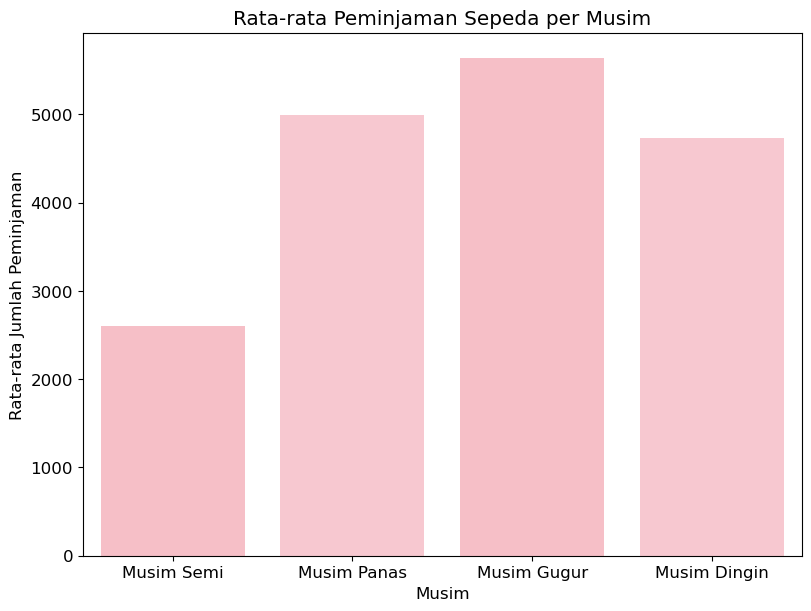

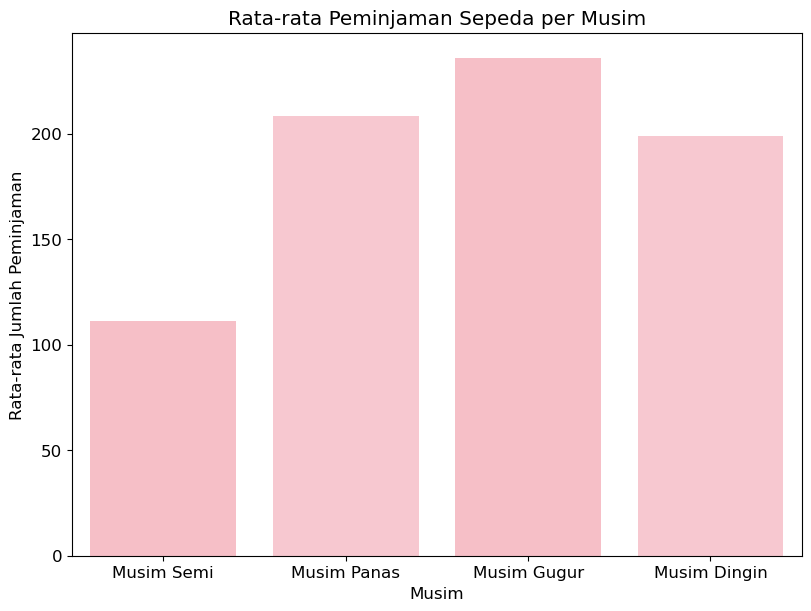

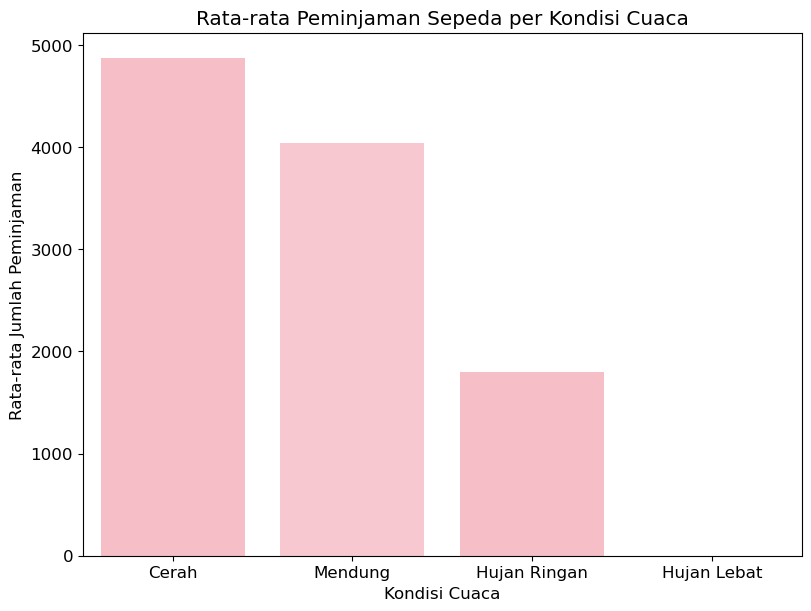

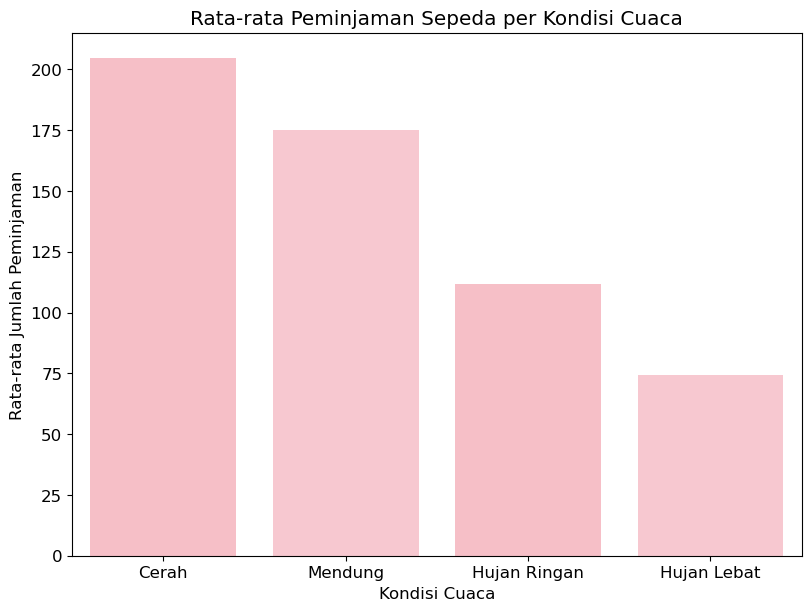

In [92]:
# Visualisasi rata-rata peminjaman per musim
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=season_avg_day.index, y=season_avg_day.values, palette=['lightpink', 'pink'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=season_avg_hour.index, y=season_avg_hour.values, palette=['lightpink', 'pink'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.show()

# Visualisasi rata-rata peminjaman per kondisi cuaca
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=weather_avg_day.index, y=weather_avg_day.values, palette=['lightpink', 'pink'])
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Rata-rata Peminjaman Sepeda per Kondisi Cuaca')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=weather_avg_hour.index, y=weather_avg_hour.values, palette=['lightpink', 'pink'])
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Rata-rata Peminjaman Sepeda per Kondisi Cuaca')
plt.show()


The code above is used to answer the question of how weather and season affect the average number of bike loans by grouping the data by season and weather conditions, then calculating the average number of bike loans for each group.  By using groupby, you group the data into groups based on season and weather and then calculate the average number of bike loans for each group. This is a simple, manual form of clustering that does not require machine learning algorithms. Visualization with sns.barplot helps visualize these differences graphically, making it easier to identify trends and patterns that may not be visible just from the numbers.Visualization with sns.barplot helps visualize these differences graphically, making it easier to identify trends and patterns that may not be apparent from just the numbers. In addition, here we use clustering without machine learning.

### Question 2 : What is the avarageof bike sharing data based on weekdays and holidays?

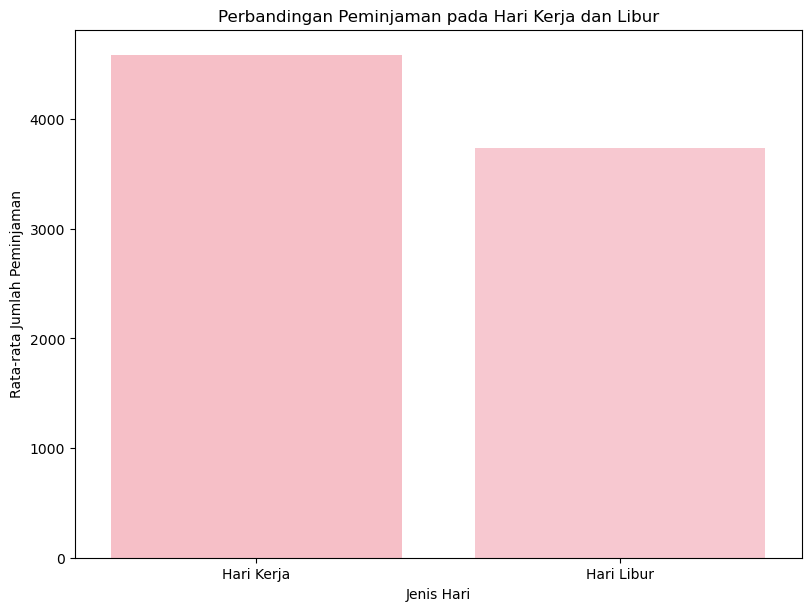

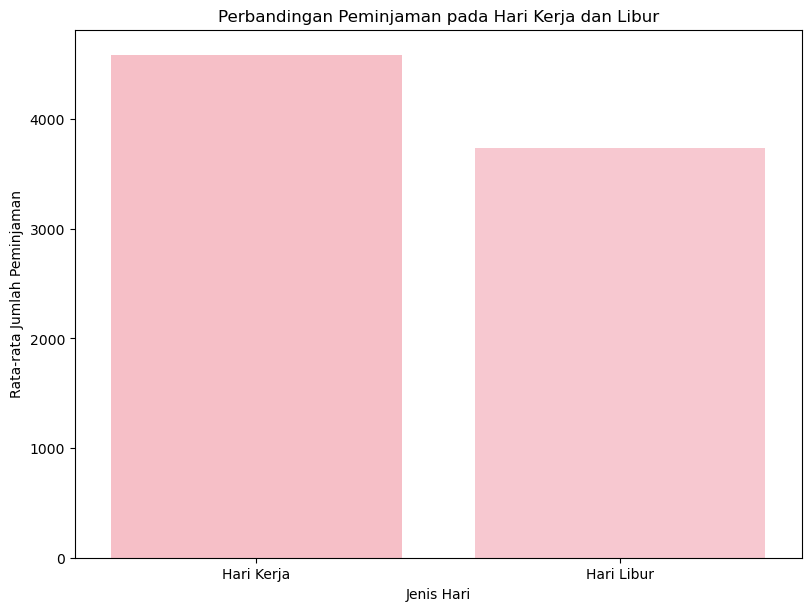

Uji t: t-statistic = 2.0211442740809424 , p-value = 0.04377768050861458
Uji t: t-statistic = 4.324633146859835 , p-value = 1.539834932960485e-05


In [33]:
#Hitung jumlah peminjaman rata-rata pada hari kerja dan hari libur
weekday_avg = day_df[day_df['workingday'] == 1]['cnt'].mean()
holiday_avg = day_df[day_df['holiday'] == 1]['cnt'].mean()

weekday_avg = hour_df[hour_df['workingday'] == 1]['cnt'].mean()
holiday_avg = hour_df[hour_df['holiday'] == 1]['cnt'].mean()


fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=['Hari Kerja', 'Hari Libur'],  y=[weekday_avg_day, holiday_avg_day], palette=['lightpink', 'pink'])
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Perbandingan Peminjaman pada Hari Kerja dan Libur')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)  # Pastikan layoutnya tertata
sns.barplot(x=['Hari Kerja', 'Hari Libur'],  y=[weekday_avg_day, holiday_avg_day], palette=['lightpink', 'pink'])
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Perbandingan Peminjaman pada Hari Kerja dan Libur')
plt.show()

#Uji t untuk melihat apakah ada perbedaan signifikan antara kedua kelompok
t_stat, p_value = stats.ttest_ind(day_df[day_df['workingday'] == 1]['cnt'],
                               day_df[day_df['holiday'] == 1]['cnt'])
print("Uji t: t-statistic =", t_stat, ", p-value =", p_value)

t_stat, p_value = stats.ttest_ind(hour_df[hour_df['workingday'] == 1]['cnt'],
                               hour_df[hour_df['holiday'] == 1]['cnt'])
print("Uji t: t-statistic =", t_stat, ", p-value =", p_value)


The above code is used to analyze bicycle loan patterns based on working days and holidays. First, the code calculates the average number of bicycle loans on workingdays and holidays for the daily (day_df) and hourly (hour_df) datasets. Then, visualization with sns.barplot is used to graphically compare the average number of loans between working days and holidays. Finally, a t-test was conducted to determine if the difference in average borrowing between weekdays and holidays was statistically significant. These steps help answer the business question of how bike borrowing patterns vary by day type, as well as provide a basis for better decision-making.

### Question 3 : Which date shows the most bike sharing data (in month)?

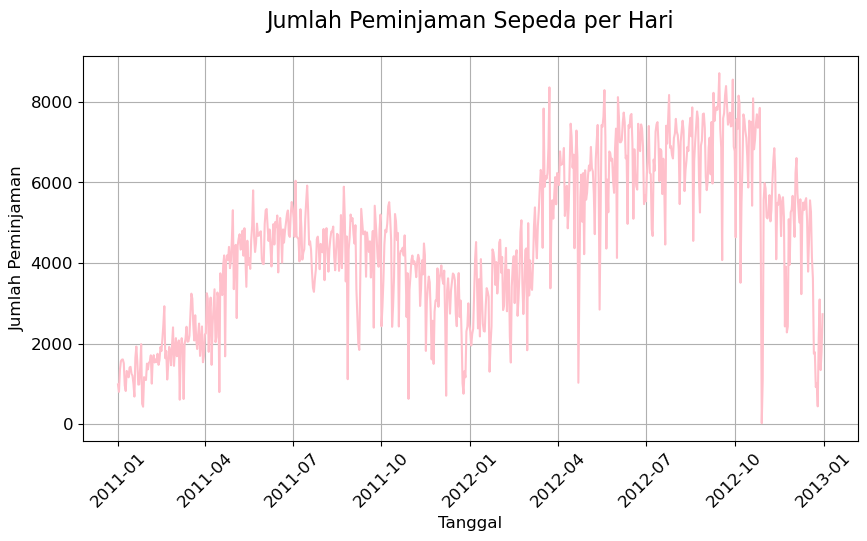

In [109]:
# Atur ukuran gambar dan font
plt.figure(figsize=(10, 5))  # Mengatur ukuran gambar menjadi 10 inci lebar dan 5 inci tinggi
plt.rcParams['font.size'] = 12  # Mengatur ukuran font secara global menjadi 12

# Buat line plot dengan warna pink dan grid
sns.lineplot(x='dteday', y='cnt', data=day_df, color='pink')
plt.grid(True)  # Menampilkan grid pada plot

# Tambahkan judul dan label dengan ukuran font yang lebih besar
plt.title('Jumlah Peminjaman Sepeda per Hari', fontsize=16)  # Judul dengan ukuran font 16
plt.xlabel('Tanggal', fontsize=12)  # Label sumbu x dengan ukuran font 12
plt.ylabel('Jumlah Peminjaman', fontsize=12)  # Label sumbu y dengan ukuran font 12
plt.xticks(rotation=45)  # Memutar label pada sumbu x sebesar 45 derajat agar lebih mudah dibaca

# Atur posisi judul agar lebih terpusat
plt.title('Jumlah Peminjaman Sepeda per Hari', fontsize=16, pad=20)  # Menambahkan padding 20 poin untuk memindahkan judul ke bawah

# Tampilkan legend (jika diperlukan)
# plt.legend()

# Simpan gambar dengan resolusi tinggi
plt.savefig('sepeda.png', dpi=300)  # Menyimpan gambar dengan nama 'sepeda.png' dan resolusi 300 dpi

plt.show()  # Menampilkan plot

The code above is used to determine the date with the highest number of bike loans by creating a line plot visualization of the number of bike loans per day. Using sns.lineplot, we plot the number of loans (cnt) against the date (dteday) of the day_df DataFrame. Setting the image size and font ensures a clear and readable visualization. The addition of grids, titles, and axis labels with larger font sizes improves the readability of the graph. The rotation of the x-axis labels helps in reading the date more easily. Finally, the graph is saved as a high-resolution image for documentation or presentation purposes. This visualization helps to quickly and effectively identify the dates with the most bike loans.

## **Conclusion**

#### Conclution 1

Based on the data analysis, it can be concluded that the number of bike loans varies significantly by season and weather conditions. In the CSV data file, fall has the highest average of bike loans per day (5644.30), while spring has the lowest average (2604.13). On the hour CSV file, fall also shows the highest average of borrowings per hour (236.02), while spring remains the lowest (111.11).

In terms of weather, on the CSV data file, sunny conditions drove the highest bike borrowings per day (4876.79), while heavy rain did not have enough data. On the hour CSV file, sunny conditions also showed the highest borrowings per hour (204.87), and heavy rain had the lowest borrowings (74.33). This shows that sunny weather and autumn are the most favorable conditions for bike loans.

#### Conclution 2

Based on data analysis, it can be concluded that the number of bicycle loans is higher on weekdays than on holidays. In the CSV data file, the average bicycle loan on weekdays is 4584.82, while on holidays it is 3735.0. In the hour CSV file, the average bicycle loan per hour on weekdays is 193.21, while on holidays it is 156.87. This data shows that bicycle loan activity is more intense on weekdays, possibly due to the use of bicycles for commuting purposes.

#### Conclution 3

Based on the data analysis, the day with the highest number of bike loans in the CSV data file is September 15, 2012, with a total of 8714 loans. Meanwhile, in the hour CSV file, the day with the highest number of bike loans was September 12, 2012, with a total of 977 loans. This data shows that both dates recorded very high bicycle loan activity, although there is a difference in the number of loans between the daily and hourly data.